# ChatGPT On Your Data(OYD)
### Query Data

So now that we’ve ingested the data, we can now use it in a chatbot interface. In order to do this, we will use the ChatVectorDBChain. In order to customize this chain, there are a few things we can change.

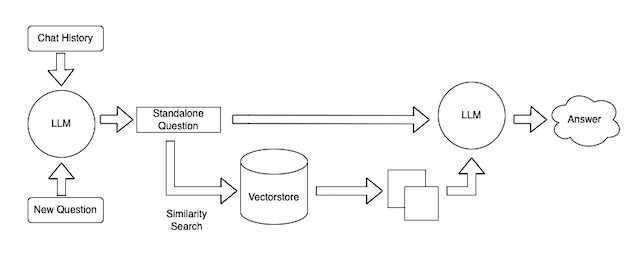

### Condense Question Prompt
The first thing we can control is the prompt that takes in the chat history and new question and produces a standalone question. This is necessary because this standalone question is then used to look up relevant documents.

This is a sneaky important step. If you just used the new question to look up relevant documents, your chatbot will not work well for follow up questions (because there may be information in the previous exchange that is needed to look up relevant docs). If you embed the whole chat history along with the new question to look up relevant documents, you may pull in documents no longer relevant to the conversation (if the new question is not related at all). Therefor, this step of condensing the chat history and a new question to a standalone question is very important.

This prompt is the CONDENSE_QUESTION_PROMPT in the query_data.py file.

### Setup Langchain

In [19]:
%pip install -qU langchain
%pip install -qU openai

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [20]:
import os
# openai API key
os.environ["OPENAI_API_KEY"] = "KEY_GOES_HERE"

In [4]:
from langchain.prompts.prompt import PromptTemplate
from langchain.llms import OpenAI
from langchain.chains import ChatVectorDBChain

### Condense question prompt

In [6]:
_template = """Given the following conversation and a follow up question, rephrase the follow up question to be a standalone question.
You can assume the question about the most recent state of the union address.
Chat History:
{chat_history}
Follow Up Input: {question}
Standalone question:"""

In [7]:
CONDENSE_QUESTION_PROMPT = PromptTemplate.from_template(_template)

### Question-Answering Prompt
The other lever you can pull is the prompt that takes in documents and the standalone question to answer the question. This can be customized to give your chatbot a particular conversational style.

This prompt is the QA_PROMPT in the query_data.py file

Note: when working off of the GitHub repo, you MUST change this prompt. The current prompt in there specifies that they should only answer questions about the state of the union address, which works for the dummy example but is probably not good for your use case.

In [8]:
template = """You are an AI assistant for answering questions about the most recent state of the union address.
You are given the following extracted parts of a long document and a question. Provide a conversational answer.
If you don't know the answer, just say "Hmm, I'm not sure." Don't try to make up an answer.
If the question is not about the most recent state of the union, politely inform them that you are tuned to only answer questions about the most recent state of the union.
Question: {question}
=========
{context}
=========
Answer in Markdown:"""
QA_PROMPT = PromptTemplate(template=template, input_variables=["question", "context"])

### Language Model
The final lever to pull is what language model you use to power your chatbot. In our example we use the OpenAI LLM, but this can easily be substituted to other language models that LangChain supports, or you can even write your own wrapper.

In [9]:
def get_chain(vectorstore):
    llm = OpenAI(temperature=0)
    qa_chain = ChatVectorDBChain.from_llm(
        llm,
        vectorstore,
        qa_prompt=QA_PROMPT,
        condense_question_prompt=CONDENSE_QUESTION_PROMPT,
    )
    return qa_chain

### Putting it all together
After making all the necessary customizations, and running python ingest_data.py, how do you interact with this chatbot?

We’ve exposed a really simple interface through which you can do. You can access this just by running python cli_app.py and this will open in the terminal a way to ask questions and get back answers. Try it out!

In [10]:
%pip install -qU gradio

Note: you may need to restart the kernel to use updated packages.


In [18]:
import os
from typing import Optional, Tuple

import gradio as gr
import openai
import pickle
from threading import Lock

ModuleNotFoundError: No module named 'openai'

In [17]:
with open("vectorstore.pkl", "rb") as f:
    vectorstore = pickle.load(f)

ModuleNotFoundError: No module named 'openai'